# Лабораторная работа 1
## Задачи и порядок выполнения работы
1. Получить массив отсчётов исходного сигнала из заранее подготовленного звукового WAV-файла с записанной речью или мелодией длительностью 8−15 с.
2. Построить графики сигнала во временной и частотной области.
3. Добавить высокочастотную шумовую составляющую с прямоугольной функцией спектральной плотности от 10 до 15 кГц и мощностью сопоставимой с мощностью звукового сигнала.
4. Построить графики сигнала во временной и частотной области.
5. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.
6. Провести фильтрацию сигнала методом скользящего среднего окном длительностью 𝑀.
7. Построить графики сигнала во временной и частотной области.
8. Записать полученный сигнал в новый WAV-файл. Прослушать полученный файл средствами операционной системы и сравнить с исходным.

### 1. Читаем сигнал

In [1]:
import IPython
import IPython.display

IPython.display.Audio('melody.mp3')

In [2]:
import librosa


(data, sampling_rate) = librosa.load('melody.mp3')
print(data, sampling_rate)

[-9.7843464e-03 -1.5854906e-02 -1.0835272e-02 ...  4.4455609e-15
  4.7876979e-15  3.2063119e-15] 22050


### 2. Строим графики сигнала во временной и частотной области

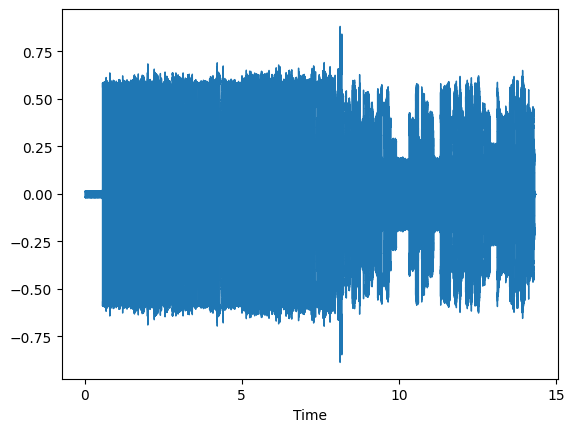

In [3]:
librosa.display.waveshow(data, sr=sampling_rate)

Text(0, 0.5, 'Амплитуда, В')

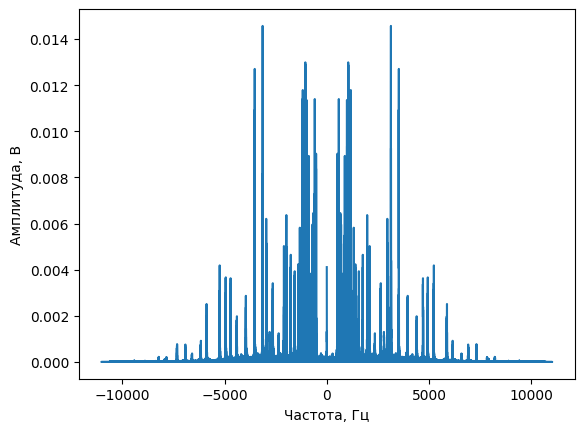

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

sp = fft(data)
length = len(data)
freq = fftfreq(length, 1 / sampling_rate)
plt.plot(freq, np.abs(sp / length))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, В')

### 3. Генерируем шум

#### Создаем пустой массив и добавляем туда шумы многих частот из диапазона 5-10 КГц

In [20]:
noise_amplitude = 0.020

noise = np.zeros(length)
time = np.linspace(0, length - 1, length) / sampling_rate
for noise_freq in range(5000, 10000, 50):
    noise += noise_amplitude * np.sin(2 * np.pi * noise_freq * time) # умножаем на data для элемента случайности

print(noise)

[ 0.          1.55555562 -1.24915745 ...  0.02099205  0.01285575
  0.01543991]


Text(0, 0.5, 'Амплитуда, В')

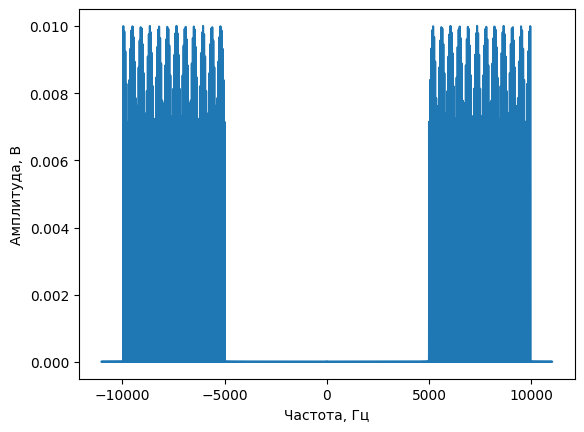

In [21]:
noise_sp = fft(noise)
noise_freq = fftfreq(length, 1 / sampling_rate)
plt.plot(noise_freq, np.abs(noise_sp / length))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, В')


#### Добавляем шумы к исходному сигналу

In [22]:
noisy_signal = data + noise
print(noisy_signal)

[-0.00978435  1.53970072 -1.25999272 ...  0.02099205  0.01285575
  0.01543991]


### 4. Строим графики полученного сигнала

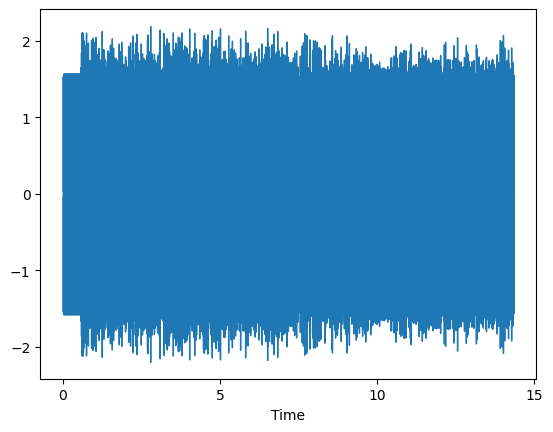

In [23]:
librosa.display.waveshow(noisy_signal, sr=sampling_rate)

Text(0, 0.5, 'Амплитуда, В')

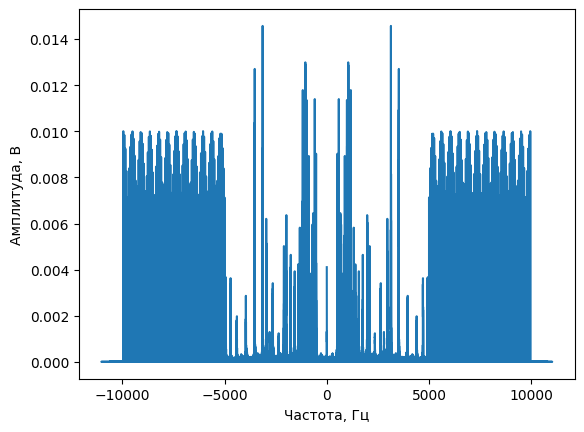

In [24]:
noisy_signal_sp = fft(noisy_signal)
noisy_signal_freq = fftfreq(length, 1 / sampling_rate)
plt.plot(noisy_signal_freq, np.abs(noisy_signal_sp / length))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, В')

### 5. Записываем в файл и слушаем

In [25]:
import soundfile

soundfile.write(
    "noisy_melody.wav",
    data=noisy_signal,
    samplerate=sampling_rate
)

IPython.display.Audio("noisy_melody.wav")

### 6. Фильтруем сигнал

In [58]:
M = 20

cumsum = np.cumsum(noisy_signal)
filtered = (cumsum[M:] - cumsum[:-M]) / M
print(filtered)

[ 0.0149128  -0.059517    0.0029805  ... -0.00176343  0.003015
  0.00138651]


### 7. Строим графики отфильтрованного сигнала

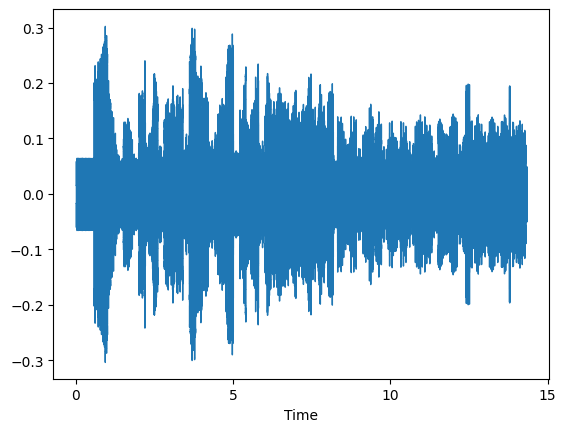

In [59]:
librosa.display.waveshow(filtered, sr=sampling_rate)

Text(0, 0.5, 'Амплитуда, В')

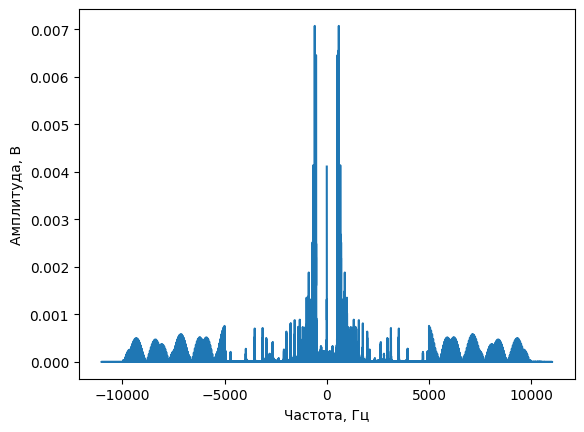

In [60]:
filtered_sp = fft(filtered)
filtered_length = len(filtered)
filtered_freq = fftfreq(filtered_length, 1 / sampling_rate)
plt.plot(filtered_freq, np.abs(filtered_sp / filtered_length))
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда, В')

### 8. Сохраняем и слушаем отфильтрованный сигнал

In [61]:
soundfile.write(
    "filtered_melody.wav",
    data=filtered,
    samplerate=sampling_rate
)

IPython.display.Audio("filtered_melody.wav")

## Контрольные вопросы

#### 1. Какие достоинства и недостатки цифрового фильтра, реализованного методом скользящего среднего Вы можете назвать?

Достоинства:
- Простота реализации
- Низкая вычислительная сложность
- Тривиальная обработка сигнала в реальном времени

Недостатки:
- Фильтр определяется числом М, которое нужно подбирать
- Непонятная АЧХ
- Работает только как ФНЧ

#### 2. Какую область частот пропускает фильтр, реализованный с помощью метода скользящего среднего?

Низкие частоты

#### 3. Какие параметры фильтра, реализованного методом скользящего среднего Вы знаете?

М - количество усредняемых точек
(возможно) a[M] - весовые коэффициенты

#### 4. Каким образом параметры фильтра, реализованного методом скользящего среднего, влияют на его АЧХ?

Чем больше М, тем больше отсекается высоких частот, АЧХ в области ВЧ уменьшается
(возможно) Манипуляцией a[M] можно добиться совершенно другого поведения фильтра

#### 5. Какие разновидности метода скользящего среднего Вы знаете? Чем они отличаются?

- Простое скользящее среднее
- Взвешенное скользящее среднее

Взвешенное скользящее среднее - при рассмотрении окна из M исходных значений, мы скалярно умножаем их на вектор коэффициентов a[M] и делим на M, чтобы получить взвешенное среднее значение, которое и попадет в выходной сигнал

Простое скользящее среднее - частный случай взвешенного, при котором a = [1; M]
